In [1]:
from time import time
from os import popen, chdir, getcwd

# Probably won't work on ur machine
# adjust the working directory where the binary is

chdir("/home/taras/Documents/UB/SO2/4/src/src")

# The next list of files should also be in the same directory
# as the binary, won't work if not...

# It also suppsoses that u have a folder base_dades/ in this working
# directory, where the files to process are

# Just execute 
#   cd <working_dir> && cp data/* .

files = ["l", "l2", "l3", "l4", "l5", "l6", "l7", "l8", "l9"]
n_lines = [int(popen(f"head -1 {f}").read()) for f in files]

In [2]:
data = []

# r_min, r_max = 2, 10
# f_range = [i for i in range(r_min, r_max + 1, 2)]
# f_range.insert(0, 1)

f_range = [i for i in range(1, 11)]

tt = time()

for n_forks in f_range:
    e_t = time()
    curr = []
    
    for f in files:
        t = time()
        o = popen(f"./test {n_forks} {f}").read()
        t = time() - t
        
        curr.append(t)
    
    print(f"Test for {n_forks} forks done, elapsed {time()-e_t:4.6f} s.")
        
    data.append(curr)
    
tt = time() - tt

print(f"Elapsed time: {tt:4.6f} s.")

Test for 1 forks done, elapsed 71.707198 s.
Test for 2 forks done, elapsed 43.810334 s.
Test for 3 forks done, elapsed 41.233529 s.
Test for 4 forks done, elapsed 40.163615 s.
Test for 5 forks done, elapsed 41.327201 s.
Test for 6 forks done, elapsed 42.851080 s.
Test for 7 forks done, elapsed 44.375478 s.
Test for 8 forks done, elapsed 45.663788 s.
Test for 9 forks done, elapsed 47.498406 s.
Test for 10 forks done, elapsed 47.819194 s.
Elapsed time: 466.452887 s.


In [3]:
for d in data:
    print("|", end="")
    
    for dt in d:
        print(f" {dt:2.6f} |", end="")
        
    print()

| 0.861719 | 1.577214 | 2.384188 | 3.531256 | 5.747587 | 8.331811 | 10.698896 | 15.589871 | 22.984588 |
| 0.809077 | 1.049454 | 1.532902 | 1.974597 | 3.678046 | 5.098650 | 6.611567 | 9.303455 | 13.752512 |
| 0.872082 | 1.121156 | 1.525085 | 1.932505 | 3.393381 | 4.765745 | 6.424670 | 8.658540 | 12.540280 |
| 0.978186 | 1.158036 | 1.553715 | 1.968113 | 3.301247 | 4.529590 | 5.903439 | 8.343398 | 12.427821 |
| 1.028635 | 1.278762 | 1.665537 | 2.087991 | 3.475279 | 4.653422 | 6.026548 | 8.548354 | 12.562600 |
| 1.142818 | 1.350619 | 1.775738 | 2.223141 | 3.601913 | 4.772954 | 6.350003 | 8.665760 | 12.968057 |
| 1.217588 | 1.468347 | 1.875232 | 2.316402 | 3.797703 | 4.964912 | 6.683343 | 8.921785 | 13.130096 |
| 1.332753 | 1.556349 | 2.024546 | 2.380047 | 3.871242 | 5.122668 | 6.725516 | 9.168306 | 13.482283 |
| 1.419068 | 1.640317 | 2.085926 | 2.494488 | 4.071455 | 5.324755 | 7.297961 | 9.327156 | 13.837204 |
| 1.518094 | 1.734413 | 2.214627 | 2.545561 | 4.195944 | 5.351850 | 6.939419 | 9

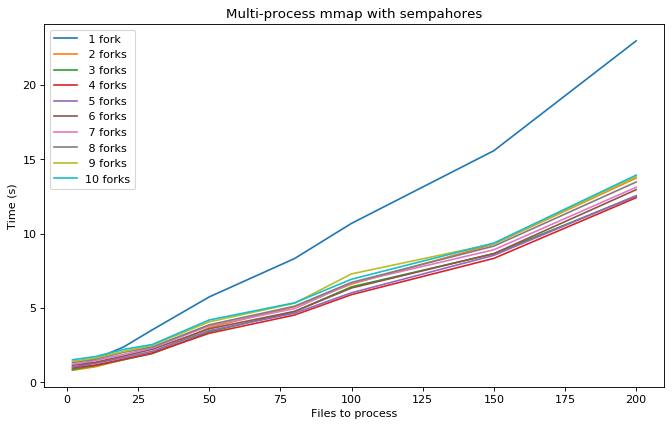

In [4]:
import numpy
from matplotlib import pyplot as plt

%matplotlib inline

cwd = getcwd()
path = f"{cwd}/doc/"

plt.figure(figsize=(10, 6), dpi=80)

for i, d in zip(f_range, data):
    plt.plot(n_lines, d, label=f"{i:2d} " + ("fork" if i == 1 else "forks"))
    
plt.title("Multi-process mmap with semaphores")
plt.xlabel("Files to process")
plt.ylabel("Time (s)")

plt.legend()
plt.show()

In [5]:
# numpy.savetxt(f"{path}bench_data.csv", numpy.asarray(data), delimiter=",")